# Analysis Companies in India

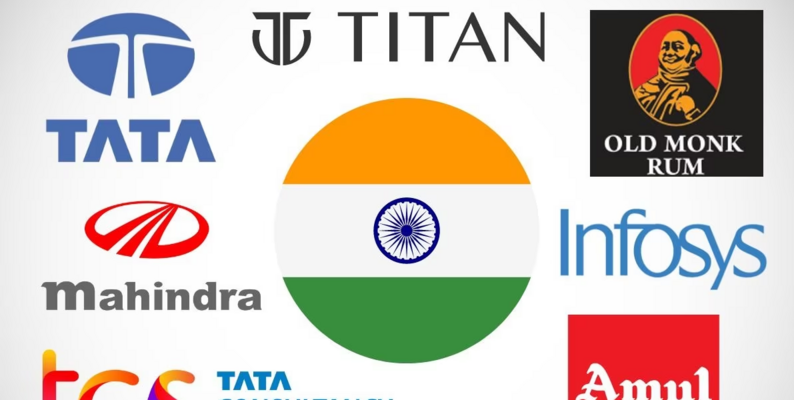

About this Dataset:

This Dataset includes notable companies with primary headquarters located in the country. The industry and sector follow the Industry Classification Benchmark taxonomy. Organizations which have ceased operations are included and noted as defunct.

In [1]:
# Import Liabraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset

df= pd.read_csv ('notable_companies (1).csv')
df.head()

,Name,Industry,Sector,Headquarters,Founded,Notes,Private/State,Active/Defunct
0,63 Moons Technologies,Technology,Software,Mumbai,1988,Financial technology,P,A
1,Aban Offshore,Energy,Oil & gas offshore drilling & other services,Chennai,1986,"Oil, petrochemical",P,A
2,ABG Shipyard,Industrials,Shipbuilding,Ahmedabad,1985,Ship engineering,P,A
3,ABP Group,Consumer services,Broadcasting & entertainment,Kolkata,1922,"Media, news",P,A
4,ACC,Industrials,Cement,Mumbai,1936,Cement,P,A


In [3]:
# Rows, columns
df.shape

(493, 8)

In [4]:
# column format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            493 non-null    object
 1   Industry        493 non-null    object
 2   Sector          448 non-null    object
 3   Headquarters    493 non-null    object
 4   Founded         493 non-null    object
 5   Notes           490 non-null    object
 6   Private/State   493 non-null    object
 7   Active/Defunct  493 non-null    object
dtypes: object(8)
memory usage: 30.9+ KB


In [5]:
# Checking nulls

df.isnull().sum()

Name               0
Industry           0
Sector            45
Headquarters       0
Founded            0
Notes              3
Private/State      0
Active/Defunct     0
dtype: int64

In [6]:
# to check secter name
df[df['Sector'].isnull()].head()

,Name,Industry,Sector,Headquarters,Founded,Notes,Private/State,Active/Defunct
8,Action Group,Conglomerate,NaN,New Delhi,1972,"Apparel, chemicals, retail, steel",P,A
9,Adani Group,Conglomerate,NaN,Ahmedabad,1988,Conglomerate,P,A
12,Aditya Birla Group,Conglomerate,NaN,Mumbai,1857,"Agribusiness, cement, chemicals",P,A
13,Ador Group,Conglomerate,NaN,Mumbai,1977,"Electronics, energy, chemicals",P,A
20,Ajanta Group,Conglomerate,NaN,Ahmedabad,1971,"Textile, transport, construction machinery",P,A


- All null in Sector are Conglomerate industry so putting "Multi-Sector"

In [7]:
# Filling null values
df['Sector'] = df['Sector'].fillna('Multi-Sector')
df.head()

,Name,Industry,Sector,Headquarters,Founded,Notes,Private/State,Active/Defunct
0,63 Moons Technologies,Technology,Software,Mumbai,1988,Financial technology,P,A
1,Aban Offshore,Energy,Oil & gas offshore drilling & other services,Chennai,1986,"Oil, petrochemical",P,A
2,ABG Shipyard,Industrials,Shipbuilding,Ahmedabad,1985,Ship engineering,P,A
3,ABP Group,Consumer services,Broadcasting & entertainment,Kolkata,1922,"Media, news",P,A
4,ACC,Industrials,Cement,Mumbai,1936,Cement,P,A


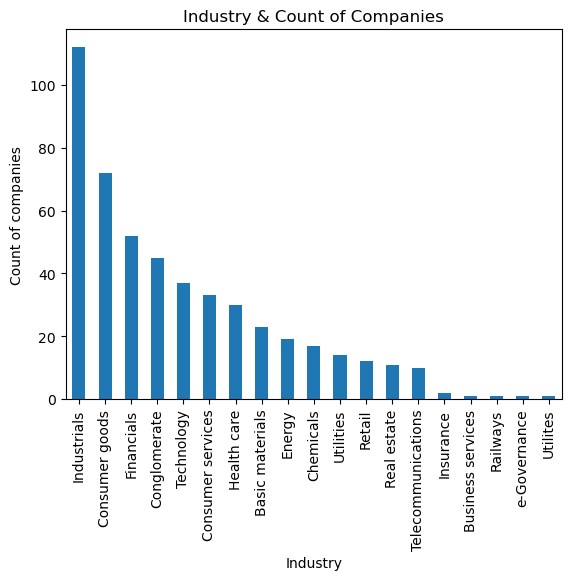

In [8]:
# Industry & Count of Companies 

df.Industry.value_counts().plot.bar()
plt.ylabel('Count of companies')
plt.title('Industry & Count of Companies')
plt.show()

- Industrial,consumer goods, finance company count is leading

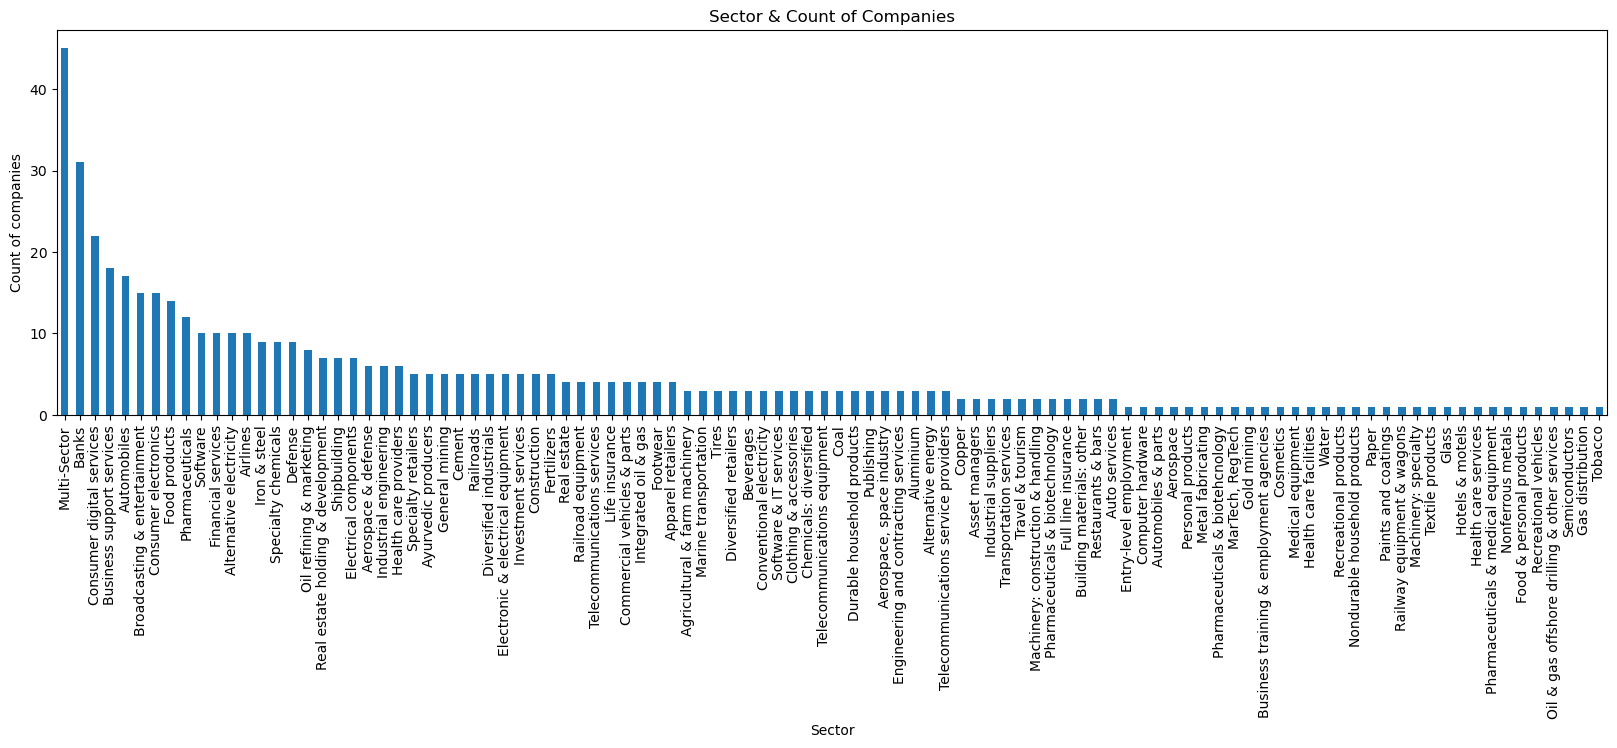

In [9]:
# sector wise companies
plt.figure(figsize=(20,5))
df.Sector.value_counts().plot.bar()
plt.ylabel('Count of companies')
plt.title('Sector & Count of Companies')
plt.show()

- Multisector companies, banks, consumer didital services companies count is leading

In [10]:
# Convert all values to strings first
df['Founded'] = df['Founded'].astype(str)

# Extract only the numeric year values (4 digits) and ignore others
df['Founded'] = df['Founded'].str.extract('(\d{4})', expand=False)

# Convert to integer, handling NaN values if any remain
df['Founded'] = pd.to_numeric(df['Founded'], errors='coerce').astype('Int64')


In [11]:
# Checking Founded Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            493 non-null    object
 1   Industry        493 non-null    object
 2   Sector          493 non-null    object
 3   Headquarters    493 non-null    object
 4   Founded         490 non-null    Int64 
 5   Notes           490 non-null    object
 6   Private/State   493 non-null    object
 7   Active/Defunct  493 non-null    object
dtypes: Int64(1), object(7)
memory usage: 31.4+ KB


In [12]:
# Count occurrences of each year
found_year_counts= df['Founded'].value_counts().sort_index()
found_year_counts = df['Founded'].value_counts().reset_index()
found_year_counts.columns = ['Founded', 'Count']  # Rename columns

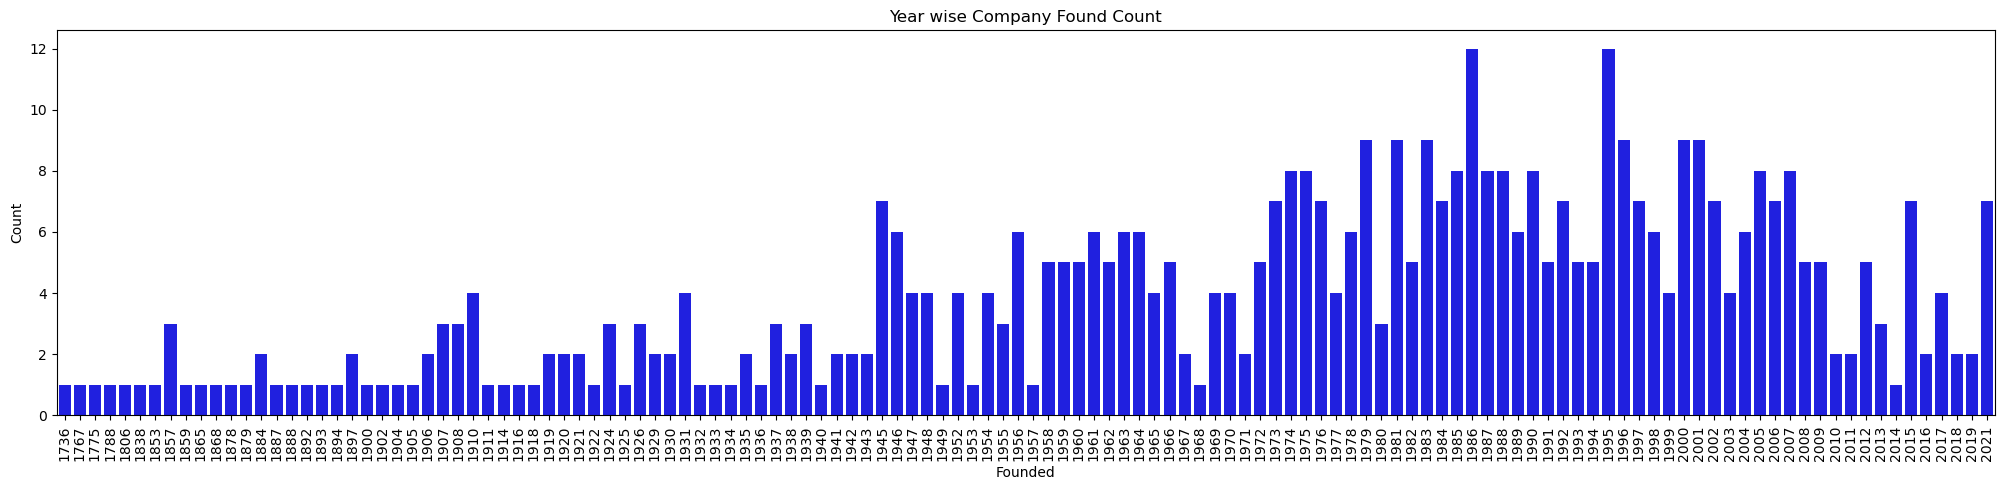

In [14]:
# Plot year wise company found count
plt.figure(figsize=(25,5))

sns.barplot(data=found_year_counts, x='Founded', y='Count',color='blue')
plt.xticks(rotation=90)
plt.title('Year wise Company Found Count')
plt.show()

In [15]:
#  Create new column decade

df['Decade']= df['Founded']//10*10
df.head(2)

,Name,Industry,Sector,Headquarters,Founded,Notes,Private/State,Active/Defunct,Decade
0,63 Moons Technologies,Technology,Software,Mumbai,1988,Financial technology,P,A,1980
1,Aban Offshore,Energy,Oil & gas offshore drilling & other services,Chennai,1986,"Oil, petrochemical",P,A,1980


In [16]:
# Decade wise value count

decade_count = df.Decade.value_counts()
decade_count = decade_count.reset_index()

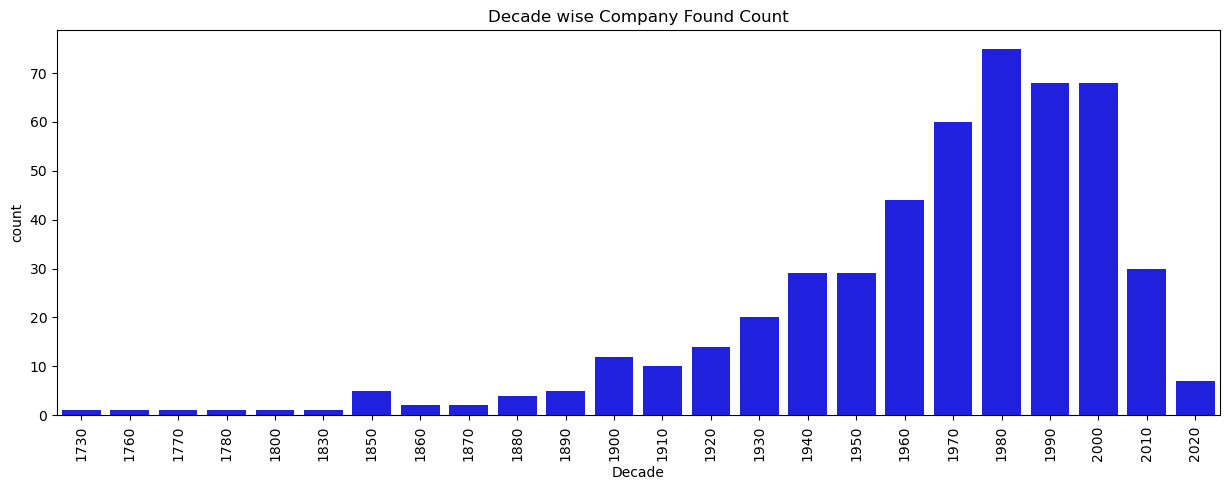

In [20]:
# Plot year wise company found count
plt.figure(figsize=(15,5))

sns.barplot(data=decade_count, x='Decade', y='count',color='blue')
plt.xticks(rotation=90)
plt.title('Decade wise Company Found Count')
plt.show()

- After Indias independance businesses are established quite quickly.

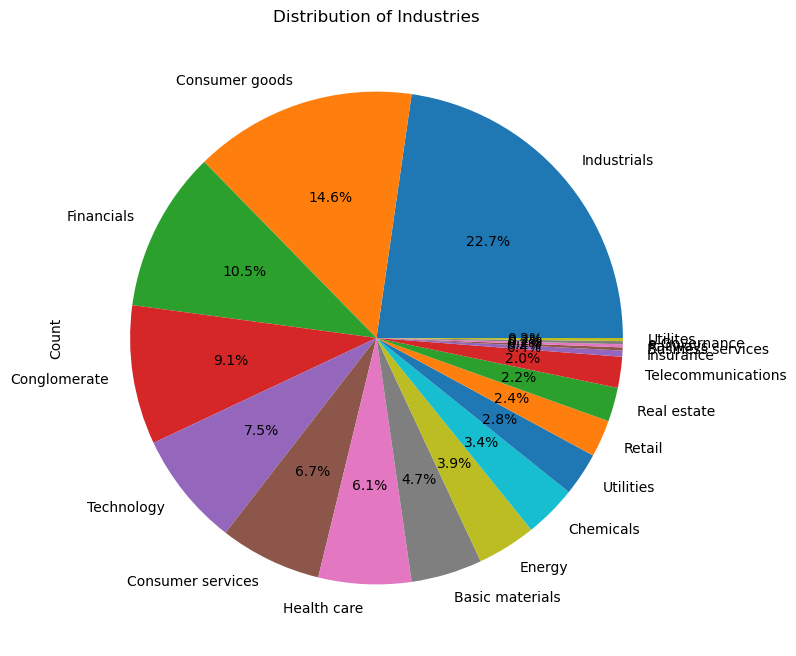

In [25]:
df_industry = df.Industry.value_counts().reset_index()
df_industry.columns = ['Industry', 'Count']

# Plot pie chart
df_industry.set_index('Industry').plot.pie(y='Count', figsize=(8, 8), autopct='%1.1f%%', legend=False)
plt.title('Distribution of Industries')
plt.show()

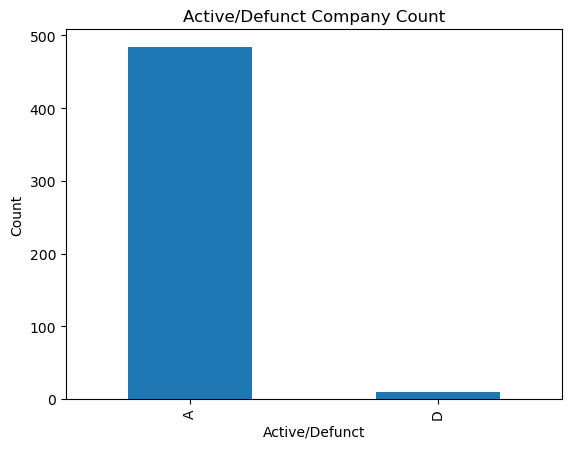

In [32]:
# Active/Defunct company count
active_count = df['Active/Defunct'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Active/Defunct Company Count')
plt.show()

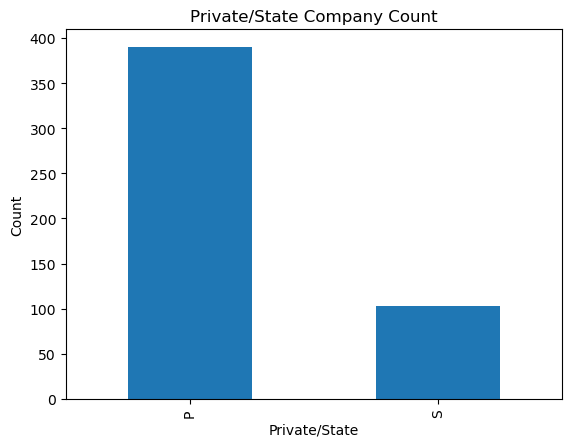

In [33]:
# Private/State company count
private_count = df['Private/State'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Private/State Company Count')
plt.show()

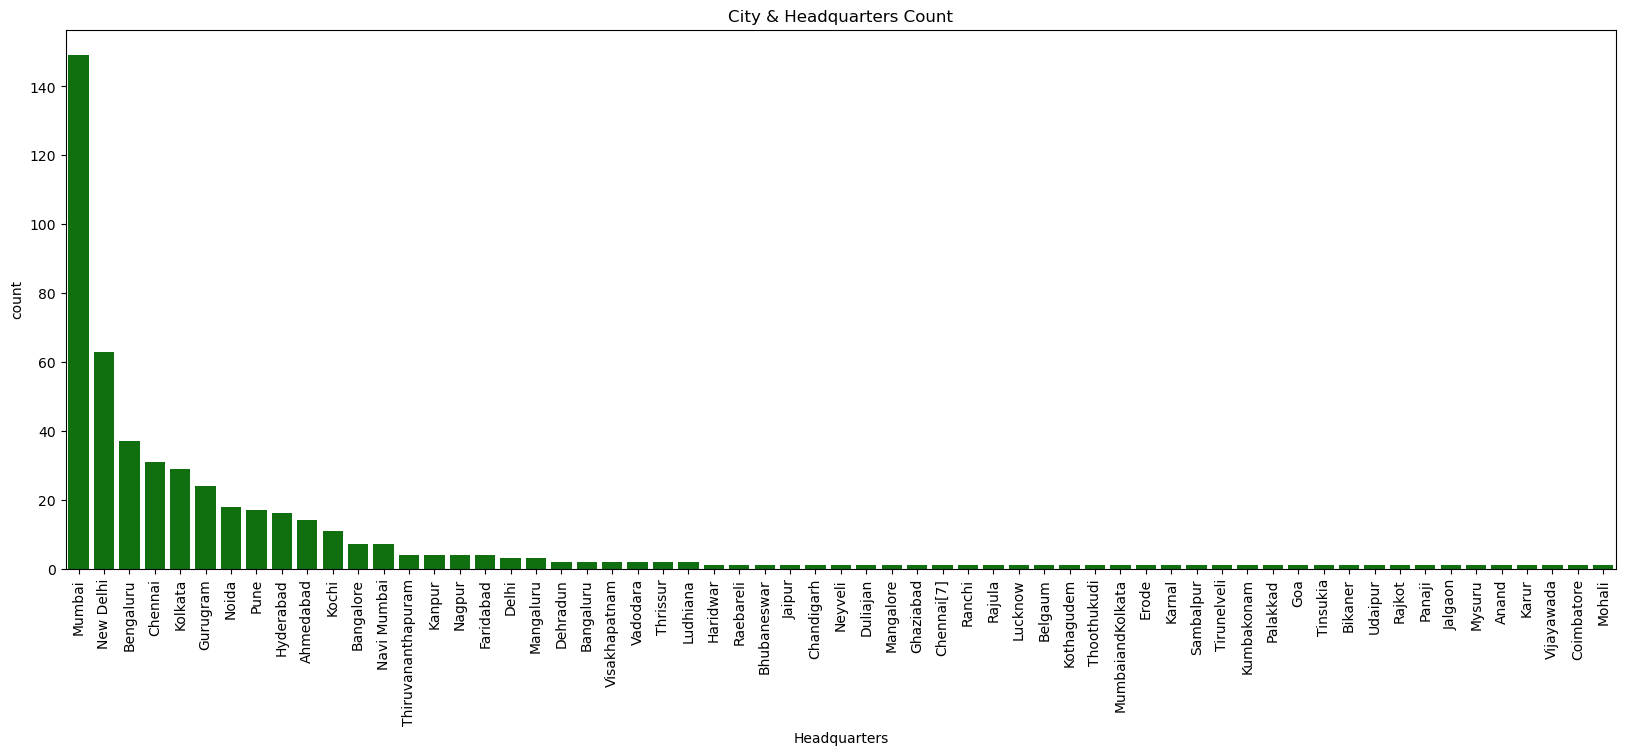

In [41]:
df_hq= df.Headquarters.value_counts().reset_index()

plt.figure(figsize=(20,7))
sns.barplot(data=df_hq, x= 'Headquarters', y='count', color='green' )
plt.title('City & Headquarters Count')
plt.xticks(rotation=90)
plt.show()

In [21]:
df.head()

,Name,Industry,Sector,Headquarters,Founded,Notes,Private/State,Active/Defunct,Decade
0,63 Moons Technologies,Technology,Software,Mumbai,1988,Financial technology,P,A,1980
1,Aban Offshore,Energy,Oil & gas offshore drilling & other services,Chennai,1986,"Oil, petrochemical",P,A,1980
2,ABG Shipyard,Industrials,Shipbuilding,Ahmedabad,1985,Ship engineering,P,A,1980
3,ABP Group,Consumer services,Broadcasting & entertainment,Kolkata,1922,"Media, news",P,A,1920
4,ACC,Industrials,Cement,Mumbai,1936,Cement,P,A,1930
